# Task Details
As of August 2019, this data set contains almost 50 thousand airbnb listings in NYC. The purpose of this task is to predict the price of NYC Airbnb rentals based on the data provided and any external dataset(s) with relevant information.

# Expected Submission
Users should submit a csv file with each listing from the data set and the model-predicted price:

id, price
2539, 149
2595, 225
3647, 150
...
# Evaluation
A solution with low root-mean-squared error (RMSE) based on cross-validation that can be reproduced and interpreted is ideal. Given the limited number of variables in this dataset, accurate predictions will be difficult.

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Some quick stats...

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.describe()  

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [7]:
df_ng = df['neighbourhood_group'].value_counts().to_frame()
df_ng

,neighbourhood_group
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [8]:
df['room_type'].value_counts().to_frame()

,room_type
Entire home/apt,25409
Private room,22326
Shared room,1160


In [9]:
df_grp1 = df[['neighbourhood_group','price']].groupby(['neighbourhood_group'],as_index=False).mean()
df_grp1=df_grp1.rename(columns={'price':'average_price'})
df_grp1

,neighbourhood_group,average_price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


In [10]:
df_grp2 = df[['room_type','price']].groupby(['room_type'],as_index=False).mean()
df_grp2=df_grp2.rename(columns={'price':'average_price'})
df_grp2

,room_type,average_price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


In [11]:
df_grp3 = df[['neighbourhood_group','room_type','price']].groupby(['neighbourhood_group','room_type'],as_index=False).mean()
df_grp3 = df_grp3.rename(columns={'price':'average_price'})
df_grp3

,neighbourhood_group,room_type,average_price
0,Bronx,Entire home/apt,127.506596
1,Bronx,Private room,66.788344
2,Bronx,Shared room,59.800000
3,Brooklyn,Entire home/apt,178.327545
4,Brooklyn,Private room,76.500099
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.239109
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [12]:
df_pivot = df_grp3.pivot(index='room_type',columns='neighbourhood_group')
df_pivot

average_price                                      \
neighbourhood_group         Bronx    Brooklyn   Manhattan      Queens   
room_type                                                               
Entire home/apt        127.506596  178.327545  249.239109  147.050573   
Private room            66.788344   76.500099  116.776622   71.762456   
Shared room             59.800000   50.527845   88.977083   69.020202   

                                   
neighbourhood_group Staten Island  
room_type                          
Entire home/apt        173.846591  
Private room            62.292553  
Shared room             57.444444

# Lets throw in some visuals

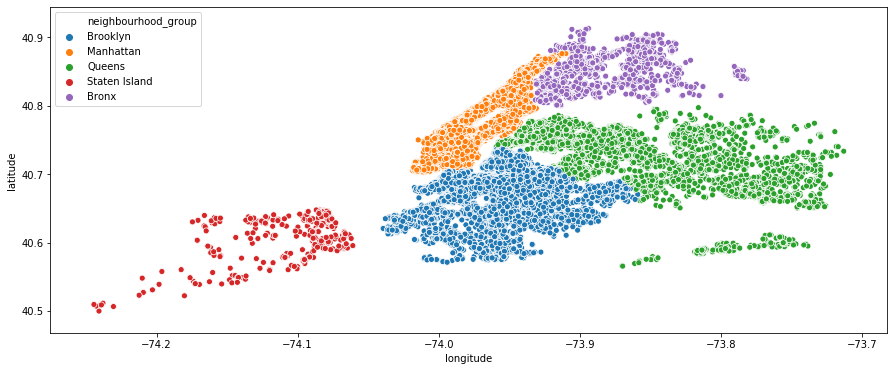

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.neighbourhood_group)

In [13]:
import folium
from folium import plugins

# New York coordinates
lat = 40.7128
lon = -74.0060
ny_map = folium.Map(location=[lat,lon], zoom_start=12)   # create new york map
# instantiate a marker cluster for the airbnb locations in the dataframe
airbnb =  plugins.MarkerCluster().add_to(ny_map)

# randomly select a portion of the data for plotting on the map
df_smp = df.sample(frac=0.01, replace=False, random_state=1)
latitudes = list(df_smp.latitude)
longitudes = list(df_smp.longitude)
price = list(df_smp.price)
labels = ['$'+str(x)+' per night' for x in price]  # add pop-up price to each marker on the map
# loop through the data and add markers to feature group
i = 0
for lat, lng, label in zip(latitudes, longitudes, labels):
    airbnb.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    folium.Marker([lat, lng], popup=label).add_to(ny_map)

ny_map.add_child(airbnb)


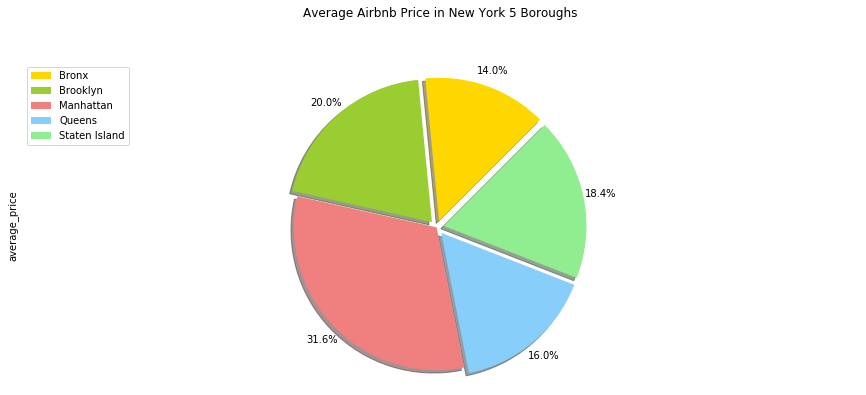

In [14]:
import matplotlib.pyplot as plt

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.05, 0.05, 0, 0.05, 0.05] # ratio for each feature with which to offset each wedge.

df_grp1['average_price'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=45,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Average Airbnb Price in New York 5 Boroughs', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=df_grp1['neighbourhood_group'], loc='upper left') 

plt.show()

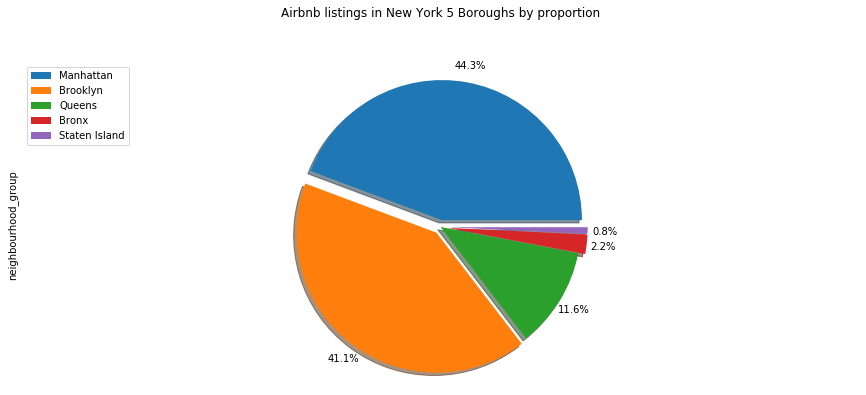

In [15]:
df_ng['neighbourhood_group'].plot(kind='pie', figsize=(15, 6),shadow=True,labels=None,autopct='%1.1f%%', pctdistance=1.12, 
                                  explode=explode_list)
# scale the title up by 12% to match pctdistance
plt.title('Airbnb listings in New York 5 Boroughs by proportion', y=1.12) 
plt.axis('equal') 
plt.legend(labels=df_ng.index, loc='upper left') 
plt.show()

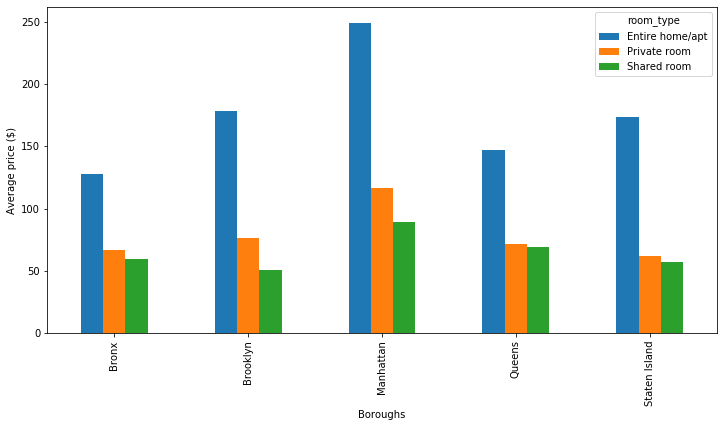

In [16]:
ax = df_pivot.T.plot.bar(figsize=(12, 6))
plt.ylabel('Average price ($)')
plt.xlabel('Boroughs')
ax.set_xticklabels(df_grp1['neighbourhood_group'])
plt.show()

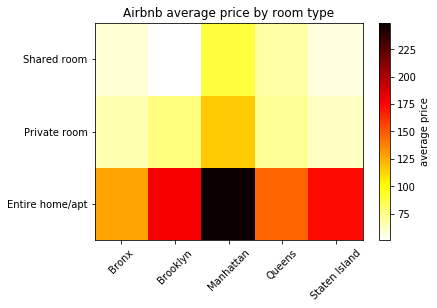

In [17]:
fig,ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='hot_r')

ylabels = df_pivot.columns.levels[1]
xlabels = df_pivot.index

ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(ylabels, minor=False)
ax.set_yticklabels(xlabels, minor=False)

#rotate label if too long
plt.xticks(rotation=45)
plt.title('Airbnb average price by room type')

cbar = fig.colorbar(im)
cbar.ax.set_ylabel('average price')
plt.show()

# Lets develop a model based on numeric input only

Lets check some correlations

In [18]:
df.drop(['id','host_id'],axis=1).corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [19]:
# numeric data
df_num = df.select_dtypes(exclude=['object'])
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0


lets count NaN in each feature

In [20]:
nan = df_num.isnull()   # this returns True and False
#for column in nan.columns.values.tolist():
#    print(nan[column].value_counts())
#    print('')
nan.sum()

id                                    0
host_id                               0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

only the column 'reviews_per_month' has NaNs. lets deal with this.

In [21]:
#df_num.fillna(0, inplace=True)
df_num = df_num.drop('reviews_per_month',axis=1)
df_num.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,1,365
3,3831,4869,40.68514,-73.95976,89,1,270,1,194
4,5022,7192,40.79851,-73.94399,80,10,9,1,0


Now we train a model...

In [22]:
X = df_num.drop(['id','host_id','latitude','longitude','price'],axis=1)
y = df_num['price']

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

lr = LinearRegression()
sgdr = SGDRegressor()
mlpreg = MLPRegressor(random_state=0, max_iter=20)
rfreg = RandomForestRegressor()
xgr = XGBRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
scaler = StandardScaler()

regressors = {'LinReg':lr,'SGDReg':sgdr,'MLPreg':mlpreg,'RandomForest':rfreg,'XGBR':xgr}
for name in regressors:
    regressor = regressors[name]
    pipeline = Pipeline(steps=[('scaler',scaler),('name',regressor)])
    model = pipeline.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    predict = model.predict(X_test)
    mae = mean_absolute_error(y_test,predict)
    print(name+': score - %1.3f, mae - %1.4f'%(score,mae))

LinReg: score - 0.014, mae - 90.7800
SGDReg: score - 0.015, mae - 91.3006


C:\Users\miket\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPreg: score - 0.015, mae - 90.8037
RandomForest: score - -0.011, mae - 91.7527
XGBR: score - -0.030, mae - 87.6791


All the tested models performed poorly. Let's add some features. 

In [24]:
# room_type and neigbourhood_group
rmtyp = pd.get_dummies(df['room_type'])
neigh_grp = pd.get_dummies(df['neighbourhood_group'])
#df_num["name_length"]=df['name'].map(str).apply(len)
neigh = pd.get_dummies(df['neighbourhood'])

In [25]:
df_new = pd.concat([df_num,rmtyp,neigh_grp,neigh], axis=1)
df_new.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,Entire home/apt,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,2539,2787,40.64749,-73.97237,149,1,9,6,365,0,...,0,0,0,0,0,0,0,0,0,0
1,2595,2845,40.75362,-73.98377,225,1,45,2,355,1,...,0,0,0,0,0,0,0,0,0,0
2,3647,4632,40.80902,-73.94190,150,3,0,1,365,0,...,0,0,0,0,0,0,0,0,0,0
3,3831,4869,40.68514,-73.95976,89,1,270,1,194,1,...,0,0,0,0,0,0,0,0,0,0
4,5022,7192,40.79851,-73.94399,80,10,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0


Lets retrain

In [26]:
X = df_new.drop(['id','host_id','price','latitude','longitude'],axis=1) #'latitude','longitude'
y = df_new['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9)

scaler = MinMaxScaler() 
rfreg = RandomForestRegressor()
pipeline = Pipeline(steps=[('scaler',scaler),('name',xgr)])
#model = pipeline.fit(X_train,y_train)
model = rfreg.fit(X_train,y_train)
score = model.score(X_test,y_test)
predict = model.predict(X_test)
mae = mean_absolute_error(y_test,predict)#, squared=False)
    
print('score - %1.3f, mae - %1.4f'%(score,mae))

score - 0.113, rmse - 67.3908


In [ ]:
model.score(X_train,y_train)

# Not so much improvement. Lets check for outliers in the data

In [ ]:
df_new.head()

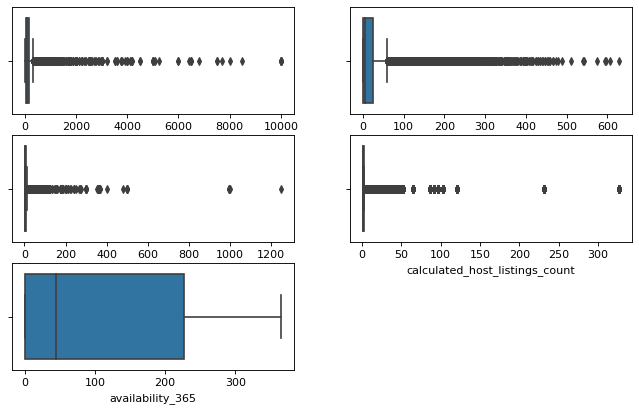

In [27]:
plt.figure(figsize=(10,6), dpi=80)
#sns.boxplot(df_new['price'])
plt.subplot(321); sns.boxplot(df_new['price'])
plt.subplot(322); sns.boxplot(df_new['number_of_reviews'])
plt.subplot(323); sns.boxplot(df_new['minimum_nights'])
plt.subplot(324); sns.boxplot(df_new['calculated_host_listings_count'])
plt.subplot(325); sns.boxplot(df_new['availability_365'])

There are obvious outliers in all the categories except for availability_365

In [28]:
# price outlier removal
q3 = df_new['price'].quantile(0.75)
q1 = df_new['price'].quantile(0.25)
price_ub = q3 + 1.5*(q3-q1)      # upper bound
price_lb = q1 - 1.5*(q3-q1)     # lower bound

# price outlier removal
q3 = df_new['number_of_reviews'].quantile(0.75)
q1 = df_new['number_of_reviews'].quantile(0.25)
nr_ub = q3 + 1.5*(q3-q1)      # upper bound
nr_lb = q1 - 1.5*(q3-q1)     # lower bound

# price outlier removal
q3 = df_new['minimum_nights'].quantile(0.75)
q1 = df_new['minimum_nights'].quantile(0.25)
mn_ub = q3 + 1.5*(q3-q1)      # upper bound
mn_lb = q1 - 1.5*(q3-q1)     # lower bound


# price outlier removal
q3 = df_new['calculated_host_listings_count'].quantile(0.75)
q1 = df_new['calculated_host_listings_count'].quantile(0.25)
cc_ub = q3 + 1.5*(q3-q1)      # upper bound
cc_lb = q1 - 1.5*(q3-q1)     # lower bound

df_new2 = df_new[df_new.price < price_ub]
#df_new2 = df_new2[df_new2.number_of_reviews < nr_ub]
#df_new2 = df_new2[df_new2.minimum_nights < mn_ub]
#df_new2 = df_new2[df_new2.reviews_per_month < rm_ub]
#df_new2 = df_new2[df_new2.calculated_host_listings_count < cc_ub]

print('removed outliers: ',df_new.shape[0]-df_new2.shape[0])

removed outliers:  2977


Lets now retrain

In [30]:
X1 = df_new2.drop(['id','host_id','price','latitude','longitude','calculated_host_listings_count'],axis=1) #'latitude','longitude'
y1 = df_new2['price']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, random_state=30)

scaler = MinMaxScaler() 
rfreg = RandomForestRegressor(n_estimators=100, random_state=1)
pipeline = Pipeline(steps=[('scaler',scaler),('name',xgr)])
model = pipeline.fit(X_train,y_train)
#model = rfreg.fit(X_train,y_train)
score = model.score(X_test,y_test)
predict = model.predict(X_test)
rmse = mean_absolute_error(y_test,predict)#, squared=False)
    
print('score - %1.3f, rmse - %1.4f'%(score,rmse))

score - 0.557, rmse - 32.8100


In [31]:
model.score(X_train,y_train)

0.6261523453165265

Removal of outliers helped!

In [130]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(xgr, X1, y1, cv=4, scoring='neg_mean_absolute_error', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.0min finished


In [ ]:
print('cross validation mae: ', -1*cv_score)

In [ ]:
#predict = model.predict(X)
prdct = pd.DataFrame(predict, columns=['predicted_price'])
df_submit = pd.concat([df_new2['id'],prdct], axis=1)
#df_submit.astype({'predicted_price':'int64'}).dtypes
df_submit.to_csv('NY_airbnb_predicted_price.csv')
df_submit.head()

lets throw a deep network at it

In [142]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
seed = 1337
np.random.seed(seed)

model = Sequential()
model.add(Dense(500, input_shape=(X_train.shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(300, kernel_initializer='normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

model.compile(loss='mean_absolute_error', optimizer='adam')


In [143]:
model.fit(X_train,y_train, batch_size=50, epochs=20, verbose=1)

Epoch 1/20
689/689 [==============================] - 3s 4ms/step - loss: 43.7646
Epoch 2/20
689/689 [==============================] - 3s 5ms/step - loss: 34.1857
Epoch 3/20
689/689 [==============================] - 3s 5ms/step - loss: 33.4449
Epoch 4/20
689/689 [==============================] - 3s 5ms/step - loss: 33.4078
Epoch 5/20
689/689 [==============================] - 3s 5ms/step - loss: 32.9811
Epoch 6/20
689/689 [==============================] - 3s 5ms/step - loss: 32.8019
Epoch 7/20
689/689 [==============================] - 3s 4ms/step - loss: 32.9365
Epoch 8/20
689/689 [==============================] - 3s 4ms/step - loss: 32.5287
Epoch 9/20
689/689 [==============================] - 3s 4ms/step - loss: 32.4885
Epoch 10/20
689/689 [==============================] - 3s 4ms/step - loss: 32.3388
Epoch 11/20
689/689 [==============================] - 3s 4ms/step - loss: 32.1127
Epoch 12/20
689/689 [==============================] - 3s 4ms/step - loss: 32.2779
Epoch 13/20
6

In [144]:
score = model.evaluate(X_test,y_test)

359/359 [==============================] - 1s 3ms/step - loss: 31.8767


In [ ]:
print('prediction',model.predict(X_test.iloc[:5,:]))
print('')
print('Actual',y_test.values[:5].reshape(-1,1))

# Now, we will attempt to add more features from external datasets

In [67]:
df2= pd.read_csv('C:\\Users\\miket\\Desktop\\Machine_learning Data_science\\Projects\\Kaggle projects\\NYC_crime predict\\data\\Population_by_Borough_NYC.csv')
df3 = pd.read_csv('C:\\Users\\miket\\Desktop\\Machine_learning Data_science\\Projects\\Kaggle projects\\NYC_crime predict\\data\\NYPD_Complaint_Data_Historic.csv')


C:\Users\miket\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
nyc_crimes = df3['BORO_NM'].value_counts().to_frame().reset_index()
nyc_population = df2[['Borough','2020']]

In [110]:
nyc_crime = nyc_crimes.rename(columns={'index':'neighbourhood_group','BORO_NM':'all_crimes'})
nyc_crime['neighbourhood_group'] = nyc_crime['neighbourhood_group'].map(lambda x: x.lower())
nyc_crime['all_crimes'] = nyc_crime['all_crimes']/nyc_crime['all_crimes'].max()
nyc_crime

,neighbourhood_group,all_crimes
0,brooklyn,1.000000
1,manhattan,0.775386
2,bronx,0.720667
3,queens,0.671501
4,staten island,0.154422


In [111]:
nyc_pop = nyc_population.iloc[1:,:]
nyc_pop=nyc_pop.rename(columns={'Borough':'neighbourhood_group','2020':'population_2020'})
nyc_pop['neighbourhood_group'] = nyc_pop['neighbourhood_group'].map(lambda x: x[3:].lower())
nyc_pop['population_2020'] = nyc_pop['population_2020'].map(lambda x: int(x.replace(',','')))
nyc_pop['population_2020'] = nyc_pop['population_2020']/nyc_pop['population_2020'].max()
nyc_pop

,neighbourhood_group,population_2020
1,bronx,0.546277
2,brooklyn,1.000000
3,manhattan,0.618581
4,queens,0.879871
5,staten island,0.183940


In [93]:
df['neighbourhood_group'] = df['neighbourhood_group'].map(lambda x: x.lower())
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [112]:
df['neighbourhood_group'].value_counts()

manhattan        21661
brooklyn         20104
queens            5666
bronx             1091
staten island      373
Name: neighbourhood_group, dtype: int64

In [114]:
df_new = pd.merge(df, nyc_pop, on='neighbourhood_group', how='inner')
df_new = pd.merge(df_new, nyc_crime, on='neighbourhood_group', how='inner')
df_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,population_2020,all_crimes
0,2539,Clean & quiet apt home by the park,2787,John,brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1.0,1.0
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1.0,1.0
2,5121,BlissArtsSpace!,7356,Garon,brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1.0,1.0
3,5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,1.0,1.0
4,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,1.0,1.0


In [124]:
#df_new.isnull().sum()

In [125]:
rmtyp = pd.get_dummies(df_new['room_type'])
neigh_grp = pd.get_dummies(df_new['neighbourhood_group'])
neigh = pd.get_dummies(df_new['neighbourhood'])

In [137]:
to_drop = ['last_review','reviews_per_month']
df_new2 = df_new.drop(df_new.columns[0:9],axis=1)
df_new2 = df_new2.drop(to_drop,axis=1)
df_new2 = pd.concat([df_new2,rmtyp,neigh,neigh_grp],axis=1)
df_new2.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,population_2020,all_crimes,Entire home/apt,Private room,Shared room,...,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,bronx,brooklyn,manhattan,queens,staten island
0,149,1,9,6,365,1.0,1.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,89,1,270,1,194,1.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,60,45,49,1,0,1.0,1.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,89,4,167,3,314,1.0,1.0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,140,2,148,1,46,1.0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [138]:
# price outlier removal
q3 = df_new2['price'].quantile(0.75)
q1 = df_new2['price'].quantile(0.25)
price_ub = q3 + 1.5*(q3-q1)      # upper bound
price_lb = q1 - 1.5*(q3-q1)     # lower bound

df_new3 = df_new2[df_new2.price < price_ub]
print('removed outliers: ',df_new2.shape[0]-df_new3.shape[0])

removed outliers:  2977


In [139]:
from sklearn.utils import shuffle

df_new3 = shuffle(df_new3)
X = df_new3.drop('price',axis=1).values
y = df_new3['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=30)

In [140]:
cv_score = cross_val_score(xgr, X, y, cv=4, scoring='neg_mean_absolute_error', verbose=1)
print('cross validation mae: ', -1*cv_score)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


cross validation mae:  [32.35721884 32.18674297 31.94535603 32.70103831]


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   56.3s finished


In [141]:
pipeline = Pipeline(steps=[('scaler',scaler),('name',xgr)])
model = pipeline.fit(X_train,y_train)
score = model.score(X_test,y_test)
predict = model.predict(X_test)
mae= mean_absolute_error(y_test,predict)
    
print('score - %1.3f, mae - %1.4f'%(score,mae))

score - 0.581, mae - 31.9311


In [81]:
dfa = pd.DataFrame({'col1': [0, 1], 'col_left': ['a', 'b']})
dfb = pd.DataFrame({'col1': [0,0,1,1,1,0], 'col_right': [2,3,4,5,6,7]})
print(dfa)
print(dfb)
print(dfb.join(dfa, on='col1',rsuffix='_r'))

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     0          2
1     0          3
2     1          4
3     1          5
4     1          6
5     0          7
   col1  col_right  col1_r col_left
0     0          2       0        a
1     0          3       0        a
2     1          4       1        b
3     1          5       1        b
4     1          6       1        b
5     0          7       0        a


In [ ]:
dfb.